In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

import plotly.express as px


import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py 
import plotly.tools as plt

import csv

In [2]:
data = pd.read_csv(r"E:\Data Analysis project jupyter lab\Web_Scraping_Python\Zameen.com\Zameen_Final_Dataset.csv")

In [3]:
data.tail()

,Title,Location,Latitude,Longitude,Area,Price,Beds,Baths,Agency,Contact_Name,Phone,Alternate_cell_no,Type,Purpose,Built_in_year,Other_Facilities
1500,Newly Constructed House Sale,"Qasim Bela, Multan",30.179751,71.391344,1 Kanal,22500000,NaN,NaN,NaN,Mohsin Nehal,(0320) 678-4379,(0320) 867-3263,House,For Sale,NaN,NaN
1501,Direct Owner Brand New 12 Marla Park Facing Dh...,"DHA Villas, DHA Defence",30.288588,71.512579,12 Marla,25000000,5.0,6.0,NaN,Innoxent batsman,(0300) 634-1797,(0300) 660-6063,House,For Sale,NaN,NaN
1502,House Sized 9000 Square Feet Available In Pak ...,"Pak Arab Fertilizer Housing Colony, Multan",30.216533,71.543463,2 Kanal,60000000,10.0,8.0,NaN,Beenish Iqbal,(0321) 731-0132,NaN,House,For Sale,NaN,NaN
1503,House Sized 2700 Square Feet In Shershah,"Shershah, Multan",30.096033,71.342355,12 Marla,17000000,4.0,4.0,NaN,Ahsan Anees786,(0300) 372-7545,(0300) 866-7681,NaN,NaN,NaN,NaN
1504,11 Marla House For Sale In Zakariya Town,"Zakariya Town, Multan",30.229054,71.490785,11 Marla,19000000,5.0,6.0,NaN,Mohsin Khan,(0303) 977-2014,(0303) 977-2014,NaN,NaN,NaN,NaN


In [4]:
data.isnull().sum()

Title                   0
Location                0
Latitude                0
Longitude               0
Area                    0
Price                   0
Beds                  198
Baths                 197
Agency                533
Contact_Name            0
Phone                   2
Alternate_cell_no     812
Type                    2
Purpose                 2
Built_in_year        1162
Other_Facilities      199
dtype: int64

## Data Cleaning

In [5]:
# fill null values in beds column with median values
median = data['Beds'].median()
data['Beds'].fillna(median, inplace=True)

In [6]:
# fill null values in baths column with median values
median1 = data['Baths'].median()
data['Baths'].fillna(median1, inplace=True)

In [7]:
#change type of bath and beds column

data[['Beds', 'Baths']] = data[['Beds', 'Baths']].astype('int')


In [8]:
#fill null values in phone column with 0

data['Phone'] = data['Phone'].fillna(0)

In [9]:
#fill null values in Alternate_cell_no column with 0

data['Alternate_cell_no'] = data['Alternate_cell_no'].fillna(0)

In [10]:
# finding categorical columns in dataset
missing_cat = [var for var in data.columns if data[var].isnull().mean()>0
     and data[var].dtypes == 'O'] 
missing_cat

['Agency', 'Type', 'Purpose', 'Other_Facilities']

In [11]:
data['Type'].value_counts()

House            1501
Farm House          1
Lower Portion       1
Name: Type, dtype: int64

In [12]:
#replacing null values with mode in Type column
data['Type'].fillna( data['Type'].value_counts().index[0], inplace=True)

In [13]:
data['Purpose'].value_counts()

For Sale    1503
Name: Purpose, dtype: int64

In [14]:
# Fill Purpose column with mode
data['Purpose'].fillna(data['Purpose'].value_counts().index[0], inplace=True)

In [15]:
# Fill Other_Facilities column with mode
data['Other_Facilities'].fillna(data['Purpose'].value_counts().index[0], inplace=True)

In [16]:
#replace all the missing vlaues with 'Missing' because only 100 out of 1500 values are given in data set if it was replaced by mean, median, mode or predict by some ML Algorithm then it may alter the orignal dataset 

data['Built_in_year'] = data['Built_in_year'].fillna('Missing')

In [17]:
#replace all missing values of Agency name with 'Not mentioned' 

data['Agency']= data['Agency'].fillna('Not Mentioned')

In [18]:
data.isnull().sum() 

Title                0
Location             0
Latitude             0
Longitude            0
Area                 0
Price                0
Beds                 0
Baths                0
Agency               0
Contact_Name         0
Phone                0
Alternate_cell_no    0
Type                 0
Purpose              0
Built_in_year        0
Other_Facilities     0
dtype: int64

In [19]:
# divide price range in equal bins
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [20]:
list(split(range(5000000, 100000000), 4))

[range(5000000, 28750000),
 range(28750000, 52500000),
 range(52500000, 76250000),
 range(76250000, 100000000)]

In [21]:
# creating bins for price range

bins = [5000000, 28750000, 52500000, 76250000, 100000000]

price_bins = ['cheap', 'affordable', 'semi-expensive', 'expensive']


#make a Price_Bins column assign pins according to prices

data['Price_Bins'] = pd.cut(data['Price'], bins, labels= price_bins)

In [22]:
#move Price_Bins column next to Price Column

column_to_move = data.pop("Price_Bins")

# insert column with insert(location, column_name, column_value)

data.insert(6, "Price_Bins", column_to_move)

In [23]:
data.tail()

,Title,Location,Latitude,Longitude,Area,Price,Price_Bins,Beds,Baths,Agency,Contact_Name,Phone,Alternate_cell_no,Type,Purpose,Built_in_year,Other_Facilities
1500,Newly Constructed House Sale,"Qasim Bela, Multan",30.179751,71.391344,1 Kanal,22500000,cheap,5,6,Not Mentioned,Mohsin Nehal,(0320) 678-4379,(0320) 867-3263,House,For Sale,Missing,For Sale
1501,Direct Owner Brand New 12 Marla Park Facing Dh...,"DHA Villas, DHA Defence",30.288588,71.512579,12 Marla,25000000,cheap,5,6,Not Mentioned,Innoxent batsman,(0300) 634-1797,(0300) 660-6063,House,For Sale,Missing,For Sale
1502,House Sized 9000 Square Feet Available In Pak ...,"Pak Arab Fertilizer Housing Colony, Multan",30.216533,71.543463,2 Kanal,60000000,semi-expensive,10,8,Not Mentioned,Beenish Iqbal,(0321) 731-0132,0,House,For Sale,Missing,For Sale
1503,House Sized 2700 Square Feet In Shershah,"Shershah, Multan",30.096033,71.342355,12 Marla,17000000,cheap,4,4,Not Mentioned,Ahsan Anees786,(0300) 372-7545,(0300) 866-7681,House,For Sale,Missing,For Sale
1504,11 Marla House For Sale In Zakariya Town,"Zakariya Town, Multan",30.229054,71.490785,11 Marla,19000000,cheap,5,6,Not Mentioned,Mohsin Khan,(0303) 977-2014,(0303) 977-2014,House,For Sale,Missing,For Sale


## EDA of Zameen.com Dataset

### 1. The top 10 locations that have the most selling properties in Multan?

In [24]:
location = data.groupby('Location')['Location'].count().sort_values(ascending=False).head(10)
location

Location
DHA Villas, DHA Defence                             387
Askari 3, DHA Defence                               141
Wapda Town Phase 2, Wapda Town                      114
Buch Executive Villas, Multan                        76
Wapda Town Phase 1, Wapda Town                       75
Royal Orchard, Multan Public School Road             40
Zakariya Town, Multan                                30
Wapda Town Phase 1 - Block E, Wapda Town Phase 1     30
DHA Phase 1 - Sector M, DHA Phase 1                  26
Shalimar Colony, Multan                              24
Name: Location, dtype: int64

In [25]:
fig = px.bar(location, x=location.values, y=location.index, labels={'index':'Location', 'x':'No. of houses'},
             title="Top 10 Location with maximum no. of availbale houses",
            color = 'Location',  color_continuous_scale=["#96ceb4", "#ffeead", "#ffcc5c" ,"#ff6f69"])
fig.layout.coloraxis.colorbar.title = 'No. of houses'

fig.show()

### 2. In what area  maximum no. of properties are available?

In [26]:
area = data.groupby('Area')['Area'].count().sort_values(ascending=False).head(10)
area

Area
10 Marla      562
12 Marla      557
1 Kanal       193
11 Marla       28
1.2 Kanal      17
18 Marla       14
14 Marla       13
10.5 Marla     13
16 Marla       12
10.9 Marla     10
Name: Area, dtype: int64

In [27]:
fig = px.line(area, x=area.index, y=area.values, labels={'index':'Area', 'y':'No. of houses'},
             title="Top 10 Propotions with maximum no. of availbale houses")
fig.show()

### 3.	10 most expensive resedential areas in multan?

In [28]:
price_area = data.groupby('Location', as_index=False)['Price'].mean().sort_values(by='Price', ascending=False).head(10)
price_area['Price'] = price_area['Price'].astype('int64')
price_area

,Location,Price
5,"Airport Road, Multan",120000000
86,"Lalazar Colony, Multan",100000000
49,"DHA Rumanza Golf Community, DHA Defence",69900000
119,"Pak Arab Fertilizer Housing Colony, Multan",60000000
51,"Defence Officer Colony, Multan",57500000
90,"MDA Chowk, Multan",50750000
92,"MDA Officers Colony, Multan",50000000
44,"DHA Phase 1 - Sector Q, DHA Phase 1",49000000
0,"Abdali Road, Multan",46666666
97,"Model Town - Block A, Model Town",46666666


In [29]:
fig = px.line(price_area, x="Location", y="Price", title='10 Most expensive resedential areas in Multan')
fig.show()

### 4. 10 economical resedential areas in Multan?

In [30]:
price_area = data.groupby('Location', as_index=False)['Price'].mean().sort_values(by='Price', ascending=True).head(10)
price_area['Price'] = price_area['Price'].astype('int64')

In [31]:
fig = px.line(price_area, x="Location", y="Price", title='10 economical resedential areas in Multan')
fig.show()

### 5. Most property type available for sale

In [32]:
group_type = data.groupby(by=["Type"]).size().reset_index(name="counts")
group_type

,Type,counts
0,Farm House,1
1,House,1503
2,Lower Portion,1


In [33]:

fig = px.line(group_type, x="Type", y="counts", title='Residential property types availbale for sale')
fig.show()


### 6. Price range for different types of houses?

In [34]:
fig = px.scatter(data, x='Type', y='Price')
fig.show()

### 7. Number of beds available in houses?

In [35]:
group_beds = data.groupby(by=["Beds"]).size().reset_index(name="counts")
group_beds

fig = px.line(group_beds, x='Beds', y='counts', labels={
                     "counts": "No. of houses",
                     "Beds": "No. of Beds"
                 },)
fig.show()

### 7. Number of baths available in houses?

In [36]:
group_bath = data.groupby(by=["Baths"]).size().reset_index(name="counts")
group_bath

fig = px.line(group_bath, x='Baths', y='counts', labels={
                     "counts": "No. of houses",
                     "Baths": "No. of Bath"
                 },)
fig.show()

### 8. Average price of houses in different years?

In [37]:

group_agency = data.groupby('Built_in_year', as_index=False)['Price'].mean().sort_values(by='Price', ascending=False).head(10)
group_agency['Price'] = group_agency['Price'].astype('int64')
group_agency
fig = px.scatter(group_agency, x="Built_in_year", y="Price", labels={'index':'Area', 'y':'No. of houses'},
             title="Top 10 Propotions with maximum no. of availbale houses")
fig.show()

### 9. Top 10 agencies that are selling most of the houses in Multan?

In [38]:
group_agency = data.groupby(by=["Agency"]).size().reset_index(name="counts").head(10)
group_agency

fig = px.line(group_agency, x='Agency', y='counts', labels={
                     "counts": "No. of houses",
                     "Agency": "Agencies"
                 },)
fig.show()

### 10. Top 10 agents that are selling most of the houses in Multan?

In [39]:
group_agent = data.groupby(by=["Contact_Name"]).size().reset_index(name="counts").head(10)
group_agent

fig = px.line(group_agent, x='Contact_Name', y='counts', labels={
                     "counts": "No. of houses",
                     "Contact_Name": "Agents"
                 },)
fig.show()

### Correlation matrix of numerical variables

<AxesSubplot:>

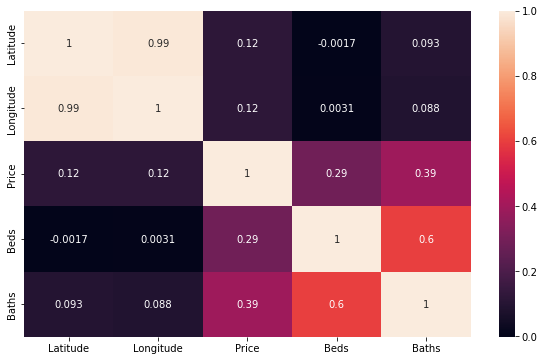

In [40]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(data.corr(), ax=ax, annot=True)

In [43]:
data.to_csv("Zameen_Clean_Dataset.csv")